<b><h1>Objetivo
Construir uma rede neural convolucional usando estimators</h1></b>

O módulo <b>tf.layers</b> do TensorFlow fornece uma API de alto nível que facilita a 
construção de uma rede neural. 

O módulo fornece métodos que facilitam a criação de camadas densas (totalmente conectadas)
e camadas convolucionais, adicionando funções de ativação.

Vamos usar a base de dados MNIST que contém digitos escritos a mão entre 0 e 9. Montar uma função
contendo todas as etapas de uma rede neural convolucional (CNN).

Material baseado nos exemplos da documentação do TensorFlow

<a href="https://github.com/tensorflow">GitHub TensorFlow</a>


In [54]:
# importar a lib do tensorflow.
%tensorflow_version 1.x
import tensorflow as tf
# importar a lib numpy.
import numpy as np
# importar a base de dados MNIST.
from tensorflow.examples.tutorials.mnist import input_data
# cria na pasta local do projeto uma pasta chamada mnist onde será descompactado os dados da base.
mnist = input_data.read_data_sets('mnist/', one_hot = False)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


O conjunto de dados MNIST compreende 55.000 exemplos de treinamento e 10.000 exemplos 
de teste dos dígitos manuscritos 0–9, formatados como imagens monocromáticas de 28x28 pixels.

![Base dados MNIST](https://www.tensorflow.org/images/mnist_0-9.png)

In [0]:
# separação da base de dados em TREINAMENTO e TESTE
X_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
X_teste = mnist.test.images
y_teste = mnist.test.labels

In [0]:
# Conversão da base de int8 para int32, para compatibilizar os dados com a lib do tensorflow
y_treinamento = np.asarray(y_treinamento, dtype = np.int32)
y_teste = np.asarray(y_teste, dtype = np.int32)

In [57]:
# Tamanho da base de treinamento.
X_treinamento.shape

(55000, 784)

In [58]:
# Tamanho da base de teste.
X_teste.shape

(10000, 784)

In [59]:
# Array contendo os dados do primeiro digito da base de treinamento.
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
# Array com respostas da base de treinamento.
y_treinamento

array([7, 3, 4, ..., 5, 6, 8], dtype=int32)

Text(0.5, 1.0, 'Classe: 3')

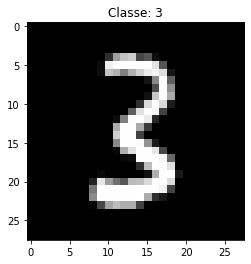

In [62]:
# Visualização de um digito da base
import matplotlib.pyplot as plt
%matplotlib inline
# Reshape de vetor para matriz. Cada imagem na base é um vetor com 784 caracteristicas. 
plt.imshow(X_treinamento[45000].reshape((28,28)), cmap = 'gray')
# Valor correpondente ao valor mostrado.
plt.title('Classe: ' + str(y_treinamento[45000]))

<b><h1>CNNs contém três componentes:</h1></b>

<b>Camadas convolucionais:</b> 
Aplicam um número especificado de filtros de convolução à imagem. Para cada sub-região, a camada executa um conjunto de operações matemáticas para produzir um único valor no mapa de características.
Normalmente nas camadas convolucionais são aplicados uma função de ativação, normalmente utilizado a função ReLu.

<b>Agrupamento de camadas:</b>
Reduzem a resolução dos dados extraídos pelas camadas convolucionais para reduzir a dimensionalidade do mapa de características para diminuir o tempo de processamento. 
Um algoritmo de pooling comumente usado é o maxpolling, que extrai sub-regiões do mapa de recursos (por exemplo, blocos de 2x2 pixels), mantém seu valor máximo e descarta todos os outros valores.

<b>Camadas densas (fully connected):</b>
Realizam a classificação nas características extraídas pelas camadas convolucionais e diminuídas pelas camadas de polling. Em uma camada densa, todos os nós da camada são conectados a todos os nós da camada anterior.

![CNN](https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

<b><h1>Construindo o classificador CNN MNIST</b></h1>

Vamos criar um modelo para classificar as imagens no conjunto de dados MNIST usando a seguinte arquitetura CNN:

<b>Convolutional Layer # 1:</b> Aplica 32 filtros 5x5 (extraindo sub-regiões de 5x5 pixels), com função de ativação ReLU 

<b>Pooling Layer # 1:</b> Executa o max pooling com um filtro 2x2 e stride de 2 (o que especifica que as regiões agrupadas não se sobrepõem)

<b>Convolutional Layer # 2:</b> Aplica 64 filtros 5x5, com função de ativação ReLU

<b>Pooling Layer # 2:</b> Novamente, realiza o max pooling com um filtro 2x2 e um passo de 2

<b>Dense Layer # 1:</b> 1.024 neurônios, com dropout de 0,4 (probabilidade de 40% de elementos serem descartados durante o treinamento). <b>Dropout é utilizando somente no treinamento</b>, o valor deve ser ajustado, de acordo com o resutlado da rede. Valores muito altos descartam características importantes, e valores muito baixos torna a rede muito adaptado aos dados de treino.

<b>Camada de saída:</b> 10 neurônios, um para cada classe alvo de dígitos (0–9).


O módulo do TensorFlow tf.layers contém os métodos para criar cada um dos três tipos de camadas: Convolutional Layer, Pooling Layer e Dense Layer.

<b>conv2d()</b>. Constrói uma camada convolucional bidimensional. Pede como parametros: número de filtros, tamanho do kernel, preenchimento e função de ativação.

<b>max_pooling2d()</b>. Constrói uma camada bidimensional de pooling usando o algoritmo de max-pooling máximo. Pede como parametros: o tamanho do filtro e o stride.

<b>dense()</b>. Constrói uma camada densa. Pede como parametros: o número de neurônios e função de ativação.

Cada um desses métodos aceita um tensor como entrada e retorna um tensor como saída. Isso facilita a conexão de uma camada a outra: basta pegar a saída do método de criação de uma camada e fornecê-la como entrada para outra.

In [0]:
def cnn_model_fn(features, labels, mode):
    # batch_size, largura, altura, canais
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
    # Convolutional Layer #1
    # input [batch_size, 28, 28, 1]
    # output [batch_size, 28, 28, 32]    
    conv1 = tf.layers.conv2d(
          inputs=input_layer,
          filters=32,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)
        
    # Pooling Layer #1
    # input [batch_size, 28, 28, 32]
    # output [batch_size, 14, 14, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    # input [batch_size, 14, 14, 32]
    # output [batch_size, 14, 14, 64]
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)    

    # Pooling Layer #2
    # input [batch_size, 14, 14, 64]
    # output [batch_size, 7, 7, 64]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Flattening Layer
    # input [batch_size, 7, 7, 64]
    # output [batch_size, 3136]
    flattening = tf.reshape(pool2, [-1, 7 * 7 * 64])
    
    # Formato da rede
    # 3136 (entradas) -> 1024 (oculta) -> 10 (saída)
    # input [batch_size, 3136]
    # output [batch_size, 1024]
    densa = tf.layers.dense(inputs = flattening, 
                            units = 1024, 
                            activation = tf.nn.relu)
    
    # dropout (somente em treinamento)
    dropout = tf.layers.dropout(
        inputs = densa, 
        rate = 0.4, 
        training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Logits Layer
    # input [batch_size, 1024]
    # output [batch_size, 10]
    logits = tf.layers.dense(inputs = dropout, units = 10)
    
    # retorna o maior da saída da rede.
    predictions = tf.argmax(logits, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    erro = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = logits)
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
        treinamento = otimizador.minimize(erro, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, train_op = treinamento)
    
    # Add evaluation metrics (for EVAL mode)
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = predictions)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, eval_metric_ops = eval_metrics_ops)


In [64]:
# Criamos o classificador e passamos a função CNN que criamos acima
classifier = tf.estimator.Estimator(model_fn = cnn_model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmu5cl193', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb669887b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Inicializamos a função de treinamento, passando os dados de treino (x, y), 
# batch_size, numero de épocas e shuffle
func_train = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_treinamento}, 
    y = y_treinamento,
    batch_size = 128, 
    num_epochs = None, 
    shuffle = True)

In [66]:
# Executamos a função de treinamento, passando o numero de épocas que será treinado.
classifier.train(input_fn=func_train, steps = 200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpmu5cl193/model.ckpt.
INFO:tensorflow:loss = 2.3245432, step = 1
INFO:tensorflow:global_step/sec: 2.98086
INFO:tensorflow:loss = 0.10518624, step = 101 (33.549 sec)
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpmu5cl193/model.ckpt.
INFO:tensorflow:Loss for final step: 0.101513855.


In [0]:
# Criamos uma função de testes, passando dos dados do teste (x, y).
func_teste = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_teste}, 
    y = y_teste, 
    num_epochs = 1,
    shuffle = False)

In [68]:
# Executamos a avaliação da rede. 
# Aqui teremos um percentual de acerto que a rede alcançou, se o resultado for ruim
# devemos voltar e reconfigurar parametros, funções, kernels, etc, para obter um melhor resultado.
resultados = classifier.evaluate(input_fn=func_teste)
resultados

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-19T02:36:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmu5cl193/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-19-02:36:48
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.9778, global_step = 200, loss = 0.06759762
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpmu5cl193/model.ckpt-200


{'accuracy': 0.9778, 'global_step': 200, 'loss': 0.06759762}

In [74]:
# Uma vez a rede treinada e avaliada, podemos fazer testes para comprovar os resultados.
# Escolhemos uma imagem qualquer da base de testes.
X_imagem_teste = X_teste[999]
X_imagem_teste.shape

(784,)

In [75]:
# Adequamos ao formato de teste.
X_imagem_teste = X_imagem_teste.reshape(1,-1)
X_imagem_teste.shape

(1, 784)

In [76]:
# Função de previsão, passamos para a rede uma imagem qualquer para que ela tente classificar.
func_previsao = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_imagem_teste},
    shuffle = False)
pred = list(classifier.predict(input_fn = func_previsao))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmu5cl193/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [77]:
# A variavel pred contém a classe que a rede obteve como resposta.
pred[0]

9

Text(0.5, 1.0, 'Classe prevista: 9')

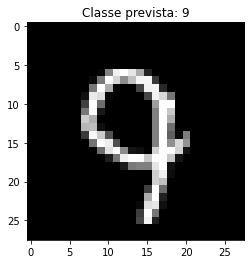

In [78]:
# Exibindo o resultado graficamente.
plt.imshow(X_imagem_teste.reshape((28, 28)), cmap = 'gray')
plt.title('Classe prevista: ' + str(pred[0]))